<a href="https://colab.research.google.com/github/SeptiLutfiana/MESIN-LEARNING/blob/main/Pertemuan12_Tugas_Mesin_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERTEMUAN 12 - TUGAS**

Nama : Septi Lutfiana

NIM : 2141720038

Kelas : 3H TI


**Mendeteksi orientasi teks dan jenis skrip**

Tugas:

1. Persiapan Gambar:
    - Gunakan gambar contoh yang disediakan ('hitchhikers-rotated.png').
    - Tampilkan gambar asli menggunakan Python dan OpenCV.
2. Deteksi Orientasi dan Skrip:
    - Implementasikan skrip Python untuk mendeteksi orientasi teks dalam gambar.
    - Gunakan Tesseract untuk mendapatkan sudut rotasi (angle) dan jenis skrip (script).
    - Tampilkan hasil orientasi dan jenis skrip.

In [1]:
# instal
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 6 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (9,264 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debco

In [49]:
import re
import cv2
import numpy as np
import pytesseract
from pytesseract import Output
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [50]:
IMG_DIR = '/content/drive/MyDrive/ML/week12/'

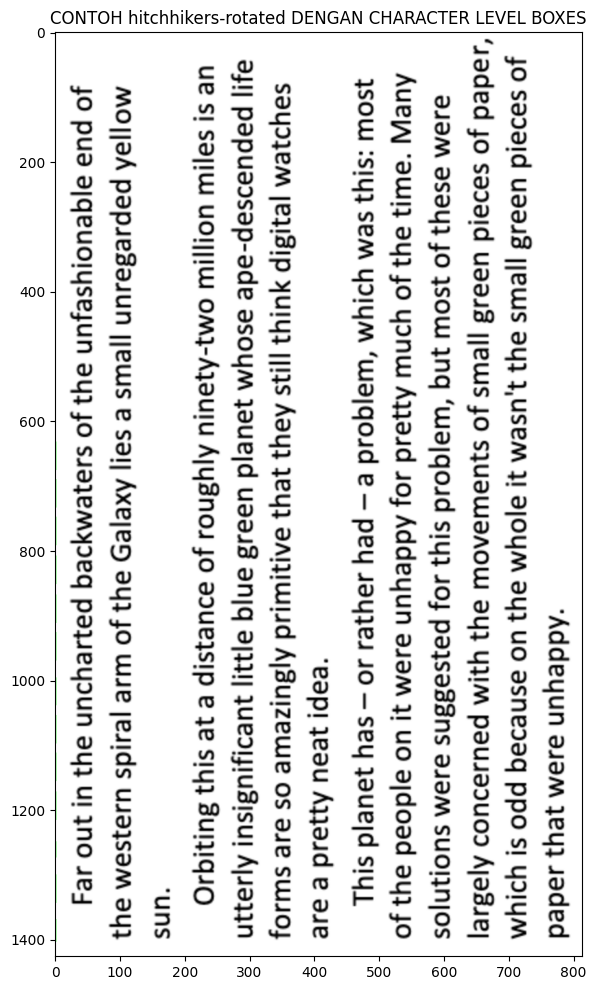

In [56]:
# Membaca gambar dari direktori
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Mendapatkan dimensi tinggi (h), lebar (w), dan channel warna (c) dari gambar
h, w, c = image.shape

# Menggunakan pytesseract.image_to_boxes() untuk mendapatkan informasi kotak karakter
boxes = pytesseract.image_to_boxes(image)

# Iterasi melalui setiap baris hasil dan membuat kotak pada gambar menggunakan OpenCV
for b in boxes.splitlines():
    b = b.split(' ')
    image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak karakter
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH hitchhikers-rotated DENGAN CHARACTER LEVEL BOXES')
plt.show()

In [59]:
# Membaca gambar contoh invoice
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Menggunakan pytesseract.image_to_data() untuk mendapatkan data teks dari gambar
d = pytesseract.image_to_data(image, output_type=Output.DICT)

# Menampilkan kunci-kunci data yang diperoleh dari hasil OCR
print('DATA KEYS: \n', d.keys())

DATA KEYS: 
 dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


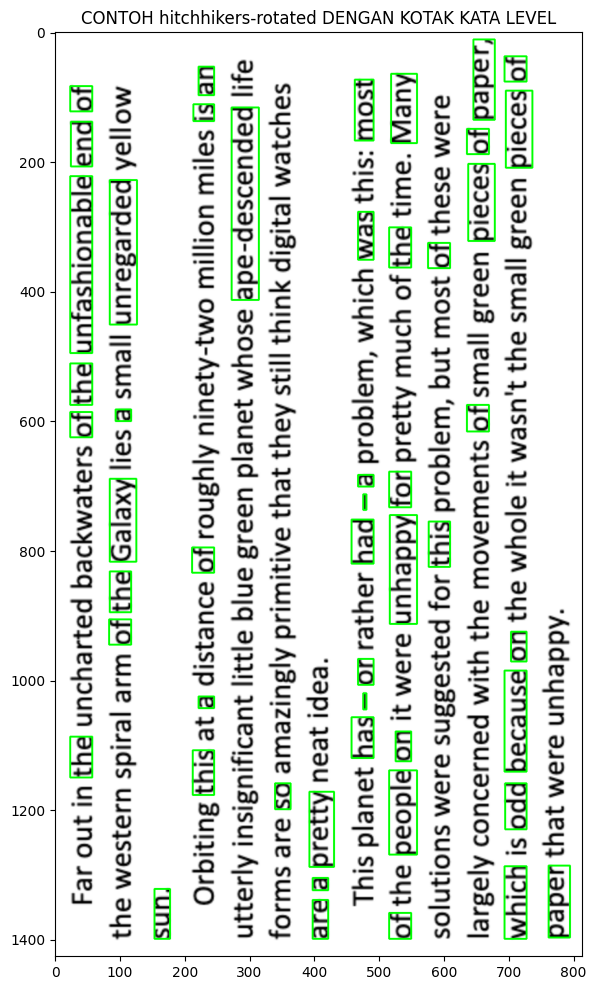

In [60]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    # Kondisi untuk hanya memilih kotak dengan kepercayaan > 60%
    if int(d['conf'][i]) > 60:
        # Mendapatkan koordinat dan ukuran kotak kata
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        # Membuat kotak pada gambar untuk kata dengan kepercayaan > 60%
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Memisahkan channel warna untuk mengonversi dari BGR ke RGB
b, g, r = cv2.split(image)
rgb_img = cv2.merge([r, g, b])

# Menampilkan gambar dengan kotak kata berdasarkan kepercayaan > 60%
plt.figure(figsize=(16, 12))
plt.imshow(rgb_img)
plt.title('CONTOH hitchhikers-rotated DENGAN KOTAK KATA LEVEL')
plt.show()


In [61]:
# Output dengan hanya bahasa Inggris yang ditentukan

# Konfigurasi khusus dengan hanya bahasa Inggris yang diatur
custom_config = r'-l eng --oem 3 --psm 6'

# Menggunakan pytesseract.image_to_string() untuk mendapatkan teks dari gambar dengan konfigurasi khusus
print(pytesseract.image_to_string(image, config=custom_config))

2 =
fa = BE y 4 o :
Oo % 2 oO) ses 2
9 = vn Yo C SE
25 g@e Esai
o> = |S| $ 2uume
sp E= SESS
+ £\o/8 me o
a 2 ° 2 Cords
= || oo sles
— | o0 = jw s SSSc=
C £ ja ow wp VO

o| ~< 2oywdvs
s Qat feo lOmMG
c Sus SG Ey
g= yor ~De woo

gs >col= EES ER
Ia & 5237 O2air
“aA o 2) a
= oO = 0 5
fe Cc ov oOo w o
y wv > & aage 5
> 5% =o 5
Vo x on 5 mig oa
8 Soe T2852 o
cis) £229 BABE
at = w»b> 2 3
o « fo Ms C =
Ba Sex — % £ y
2s vs ¢ cesce
Tw le Sac £ BS
— c = = oo
2 Cg @ fees eo
e np> — Qa
2 2 EB=a Gg a) o
20 cs | oo 5 c
c ® cfr 5D #ws Ss
3 ot — o
v SESE 2 eig 2
co a ef covrme G
lt YY Cg Ww oYpmes
£¢ Ba cesees
2 oO 2% y & n oO &
2 + 5s £ Aigo Vu s
SCS $S%°R oOo >
5 2een elses
S2e65E FS 3 a
s2 588 SOs
€B 3 Se on =



In [62]:
# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Use Tesseract to detect script and orientation
script, angle = pytesseract.image_to_osd(gray, output_type=pytesseract.Output.DICT)['script'], \
                pytesseract.image_to_osd(gray, output_type=pytesseract.Output.DICT)['rotate']

# Display the detected script and orientation
print(f"Detected Script: {script}")
print(f"Detected Orientation Angle: {angle} degrees")

Detected Script: Latin
Detected Orientation Angle: 90 degrees
